# Convolutional Neural Networks (CNN)

In [11]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
# datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Separate features and labels
X = train.drop("label", axis=1)
Y = train["label"]

In [13]:
# Normalize pixel values
X = X / 255.0
test = test / 255.0

# Reshape for CNN input
X = X.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

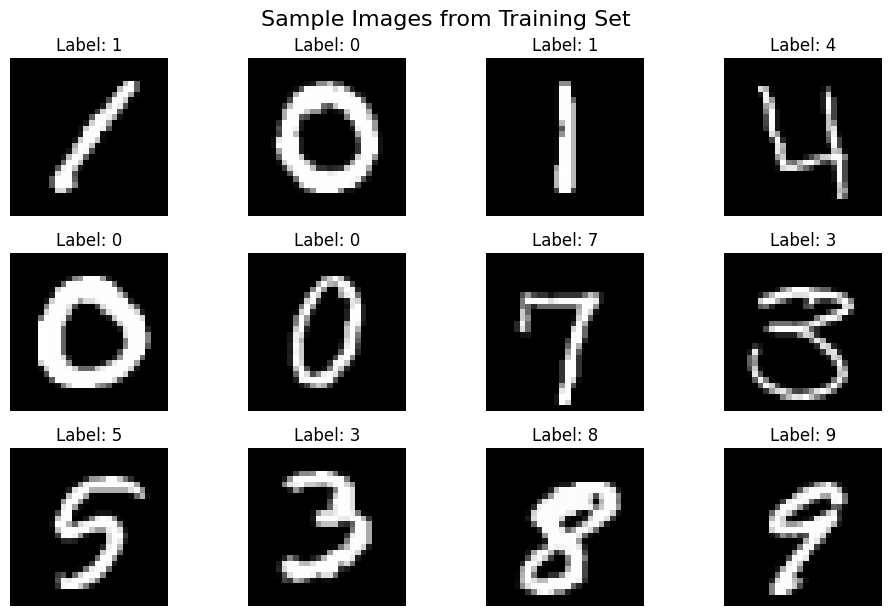

In [14]:
# Visualize some sample images with their labels
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = train.iloc[i, 1:].values.reshape(28, 28)
    label = train.iloc[i, 0]
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Images from Training Set", fontsize=16, y=1.02)
plt.show()


In [15]:
# Split
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=2)

# One-hot encode labels
Y_train = to_categorical(Y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# model building
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


In [18]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=1e-5
)

In [20]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=100,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // 32,
    callbacks=[lr_reduction]
)

Epoch 1/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.7199 - loss: 0.9297 - val_accuracy: 0.9774 - val_loss: 0.0696 - learning_rate: 0.0010
Epoch 2/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.9688 - loss: 0.1705 - val_accuracy: 0.9776 - val_loss: 0.0701 - learning_rate: 0.0010
Epoch 3/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9326 - loss: 0.2293 - val_accuracy: 0.9824 - val_loss: 0.0626 - learning_rate: 0.0010
Epoch 4/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.9375 - loss: 0.1292 - val_accuracy: 0.9826 - val_loss: 0.0632 - learning_rate: 0.0010
Epoch 5/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9483 - loss: 0.1710 - val_accuracy: 0.9767 - val_loss: 0.0768 - learning_rate: 0.0010
Epoch 6/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.9375 - loss: 0.3629 - val_accuracy: 0.9769 - val_loss: 0.0756 - learning_rate: 0.0010
Epoch 7/100
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step -

In [21]:
# Predict
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [22]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix
print("\nClassification Report:\n")
print(classification_report(Y_true, Y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       485
           2       1.00      0.99      1.00       403
           3       1.00      0.99      0.99       418
           4       0.99      0.99      0.99       461
           5       1.00      0.99      0.99       372
           6       0.99      0.99      0.99       413
           7       1.00      1.00      1.00       446
           8       0.97      0.99      0.98       382
           9       0.99      0.99      0.99       409

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



In [23]:
# F1 Scores
print(f"F1 Score (Macro): {f1_score(Y_true, Y_pred_classes, average='macro'):.4f}")
print(f"F1 Score (Micro): {f1_score(Y_true, Y_pred_classes, average='micro'):.4f}")
print(f"F1 Score (Weighted): {f1_score(Y_true, Y_pred_classes, average='weighted'):.4f}")

F1 Score (Macro): 0.9934
F1 Score (Micro): 0.9936
F1 Score (Weighted): 0.9936


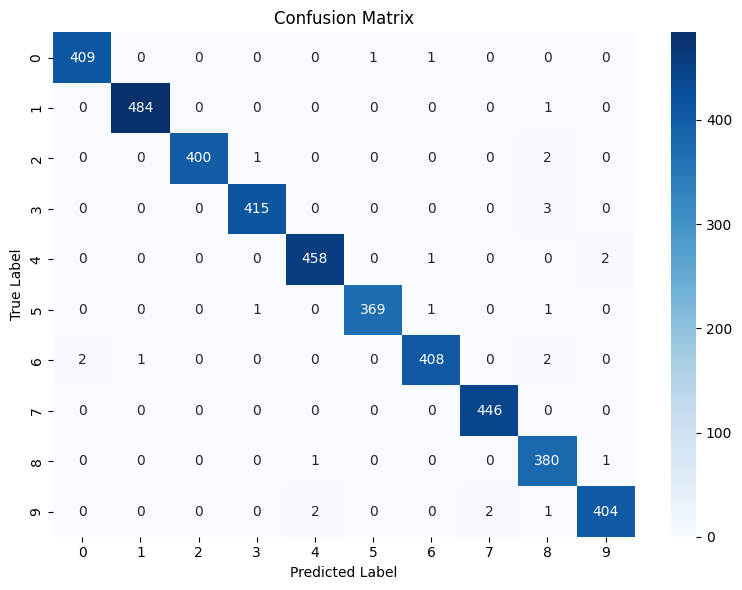

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

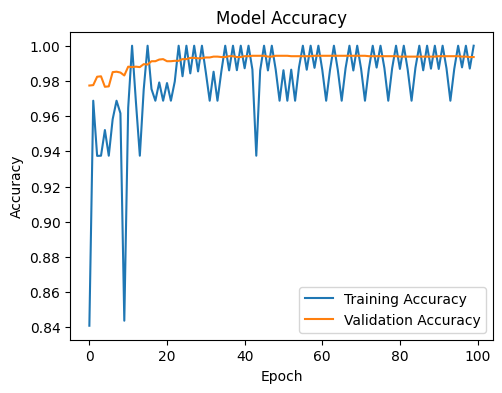

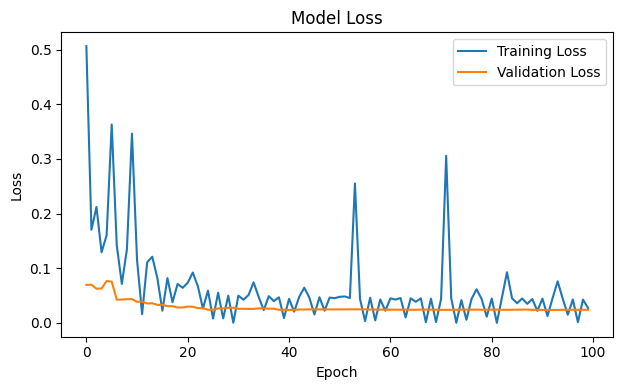

In [25]:
#Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
Y_test_pred = model.predict(test)
Y_test_classes = np.argmax(Y_test_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [27]:
# Create submission DataFrame
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(Y_test_classes) + 1),
    "Label": Y_test_classes
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'


Enter a digit (0–9) to view a predicted image (or -1 to exit):  6


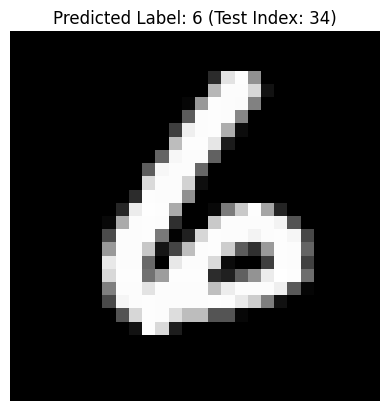

Enter a digit (0–9) to view a predicted image (or -1 to exit):  1


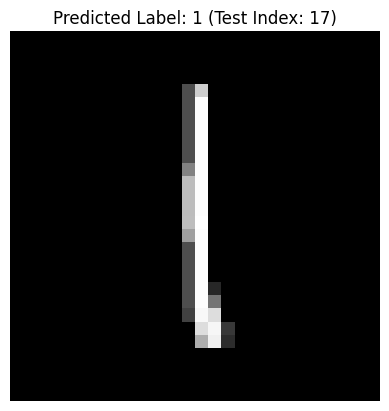

Enter a digit (0–9) to view a predicted image (or -1 to exit):  3


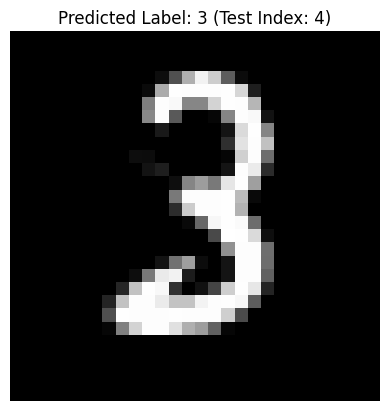

Enter a digit (0–9) to view a predicted image (or -1 to exit):  8


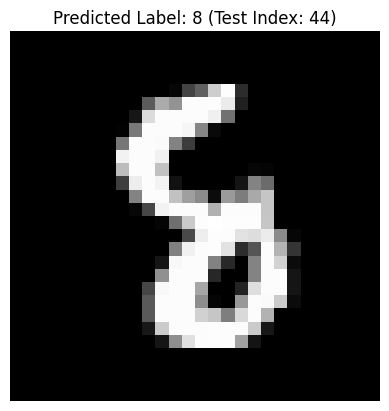

Enter a digit (0–9) to view a predicted image (or -1 to exit):  -1


Exiting viewer.


In [34]:
# import matplotlib.pyplot as plt

def show_image_for_digit(test_images, predictions):
    while True:
        user_input = input("Enter a digit (0–9) to view a predicted image (or -1 to exit): ")

        if user_input.strip() == "-1":
            print("Exiting viewer.")
            break

        try:
            digit = int(user_input)

            if digit < 0 or digit > 9:
                print("❌ Please enter a number between 0 and 9.")
                continue

            # Find all indices where prediction == digit
            indices = np.where(predictions == digit)[0]

            if len(indices) == 0:
                print(f"No predictions found for digit '{digit}'.")
                continue

            # Pick the first matching index
            idx = indices[0]

            # Display the image
            img = test_images[idx].reshape(28, 28)
            plt.imshow(img, cmap='gray')
            plt.title(f"Predicted Label: {digit} (Test Index: {idx})")
            plt.axis('off')
            plt.show()

        except ValueError:
            print("❌ Invalid input. Please enter an integer.")

# Call the function
show_image_for_digit(test, Y_test_classes)
